In [1]:
# Exploring our data and visulization
# Train and create a Linear Regression Model
# Evaluate our model
# Make Predictions
# Calculate Root Means Square Error (RMES)
# What if we consider more/less features ?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

In [3]:
house = pd.read_csv('home_data.csv')

In [4]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
house.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [6]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null int64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(4), int64(16), object(1)
memory usage: 3.5+ MB


In [7]:
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Text(0, 0.5, 'Price of House')

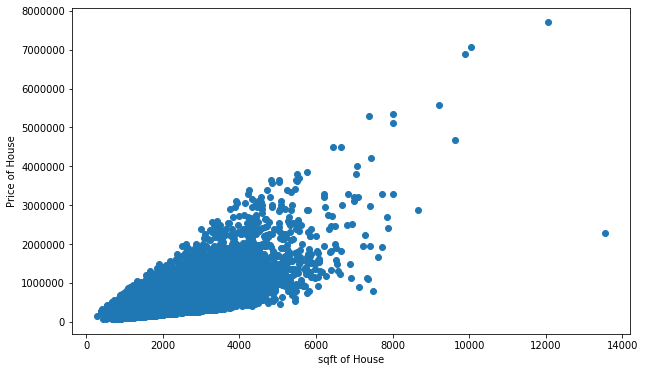

In [9]:
plt.figure(figsize = (10,6))
plt.scatter(house.sqft_living,house.price)
plt.xlabel('sqft of House')
plt.ylabel('Price of House')

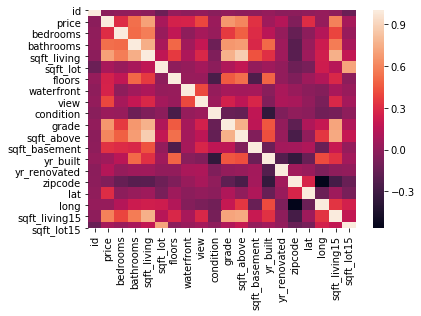

In [10]:
sns.heatmap(house.corr())

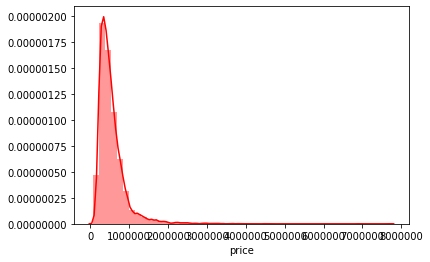

In [11]:
sns.distplot(house['price'],color = 'red')

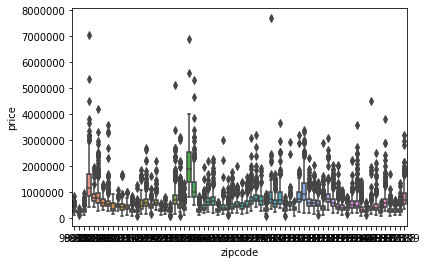

In [12]:
sns.boxplot(x='zipcode',y='price',data=house)

In [13]:
X = house[['bedrooms','bathrooms','sqft_living','sqft_lot','floors',
           'sqft_above','sqft_lot15','yr_built','condition','zipcode']]

In [14]:
y = house['price']

In [15]:
X.shape, y.shape

((21613, 10), (21613,))

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# Training , Testing  75/25

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=5)

In [19]:
print(X_train.shape , y_train.shape)
print(X_test.shape , y_test.shape)

(16209, 10) (16209,)
(5404, 10) (5404,)


In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
prediction = model.predict(X_test)

In [23]:
house1 = house[house['id'] == 6414100192]
house1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639


In [24]:
prediction[1]

242392.5433738893

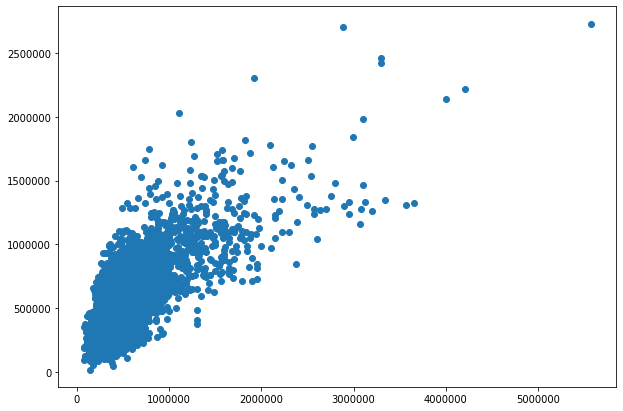

In [25]:
plt.figure(figsize = (10,7))
plt.scatter(y_test,prediction)

In [26]:
model.coef_

array([-6.86787300e+04,  6.50420543e+04,  2.89157700e+02,  9.38917798e-03,
        4.69476414e+04,  2.29800354e+01, -6.06551212e-01, -3.21094963e+03,
        2.19505966e+04,  1.23774470e+02])

In [27]:
df_coef = pd.DataFrame(model.coef_,X.columns,columns = ['coeffic value'])
df_coef

,coeffic value
bedrooms,-68678.729971
bathrooms,65042.054315
sqft_living,289.157700
sqft_lot,0.009389
floors,46947.641390
sqft_above,22.980035
sqft_lot15,-0.606551
yr_built,-3210.949631
condition,21950.596570
zipcode,123.774470


In [28]:
model.intercept_

-5957070.513787943

In [29]:
# RMS Error

In [30]:
from sklearn import metrics

In [31]:
mse = metrics.mean_squared_error(y_test,prediction)
mse

58214449156.36607

In [32]:
RMSE = np.sqrt(mse)
RMSE

241276.70661787075

In [33]:
X = house[['bedrooms','bathrooms','sqft_living','sqft_lot','yr_built','zipcode']]
y = house['price']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=7)

In [35]:
model2 = LinearRegression()
model2.fit(X_train,y_train)
prediction2 = model2.predict(X_test)

In [36]:
prediction[1], prediction2[1]

(242392.5433738893, 718281.207960289)

In [37]:
mse2 = metrics.mean_squared_error(y_test,prediction2)
mse2

61631580368.51299

In [38]:
RMSE2 = np.sqrt(mse2)
RMSE2

248257.08523325773

In [39]:
RMSE

241276.70661787075